In [2]:
import requests
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import statistics
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
a = open('../data/train_text.txt', 'r')
train_tweets = a.read().split('\n')
a.close()

b = open('../data/train_labels.txt', 'r')
train_labels = b.read().split('\n')
b.close()

### Tweet Lengths

<AxesSubplot:title={'center':'Tweet Length Distribution By Character'}, ylabel='Frequency'>

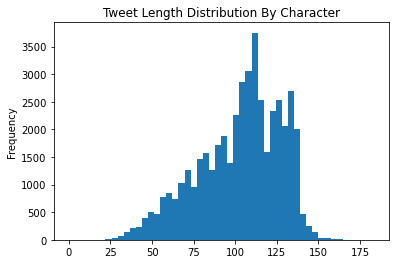

In [4]:
# Create a new list of the tweets without any punctuation
no_punc = []
for tweet in train_tweets:
  no_punc.append(tweet.translate(str.maketrans('', '', string.punctuation)))

# Makes all tweets lowercase
train_tweets = [x.lower() for x in no_punc]

# Define a dataframe of the tweets without punctuation and their labels
df = pd.DataFrame()
df['tweet']  = train_tweets
df['label']  = train_labels

# Append the length of each tweet to our dataframe
tweet_length = []
for i in df['tweet']:
  tweet_length.append(len(i))
df['tweet_length'] = tweet_length

df['tweet_length'].plot(
    kind='hist',
    bins=50,
    title='Tweet Length Distribution By Character')


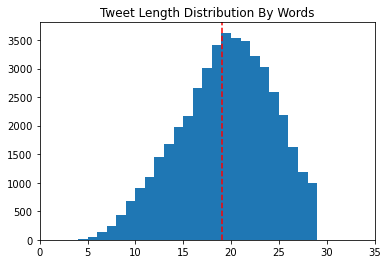

Text(0.5, 1.0, 'Average Tweet Length by Sentiment')

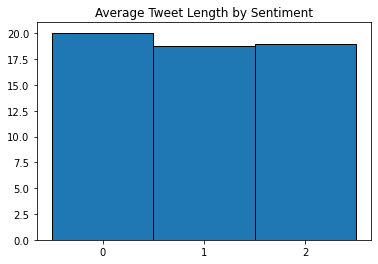

In [15]:
# Length in words
tweet_lengths = []
for i in range(len(df)):
  tweet_lengths.append(len(df.tweet.iloc[i].split()))

# fixed bin size
bins = np.arange(0, 30, 1) # fixed bin size

plt.xlim([min(tweet_lengths), max(tweet_lengths)])

plt.hist(tweet_lengths, bins=bins)
plt.title('Tweet Length Distribution By Words')
plt.axvline(x=statistics.mean(tweet_lengths), color="red", ls="dashed")

plt.show()

d={}

# Mean word length for each sentiment
for i in range(df["label"].nunique() - 1):
  labels = df[df["label"]==str(i)]
  tweet_lengths = []
  for j in range(len(labels)):
    tweet_lengths.append(len(labels.iloc[j][0].split()))
  d[i]= round(statistics.mean(tweet_lengths), 3)

plt.bar(d.keys(), d.values(), 1, edgecolor='black')
plt.xticks(range(3))
plt.title('Average Tweet Length by Sentiment')


### What words come up the most?


user 16840
tomorrow 7010
just 3901
day 3711
going 3023
night 2883
friday 2641
im 2640
1st 2593
sunday 2498
like 2470
time 2354
saturday 2049
2nd 1870
new 1850
amp 1791
game 1731
monday 1679
good 1516
3rd 1492


<AxesSubplot:title={'center':'Top 20 words in tweets after removing stop words'}, xlabel='TweetText'>

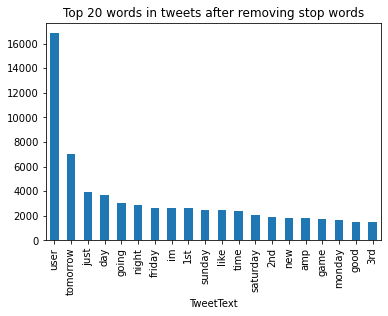

In [23]:
# Using CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['tweet'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])
df2.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in tweets after removing stop words')

In [24]:
len(df.iloc[0][0].split())

d={}

for i in range(len(df)):
  for j in df.iloc[i][0].split():
    if j not in d:
      d[j] = 1
    else:
      d[j] += 1

In [25]:
word_occurence = pd.DataFrame(list(d.items()),columns = ['Word','Occurence'])

In [26]:
word_occurence = word_occurence.sort_values("Occurence", ascending=False)
#3rd most common "word" was an empty string so remove that
#word_occurence = word_occurence.drop([10])
word_occurence.iloc[0:10]

,Word,Occurence
3,the,37920
41,to,20902
1,user,16840
2,in,13644
35,on,13074
55,a,12817
74,and,12604
30,i,12540
6,of,10870
37,for,9935


<AxesSubplot:xlabel='Word'>

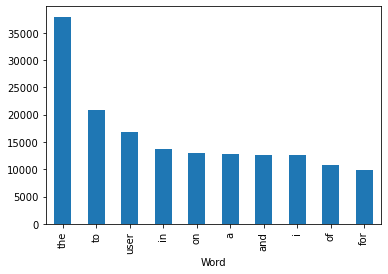

In [27]:
word_occurence.iloc[0:10].plot.bar(x="Word", y="Occurence", legend=None)

Most common words without filler words

In [40]:
df['text_punct'] = df['tweet'].str.replace('[^\w\s]','')
df['text_punct'].head()

#Importing stopwords from nltk library
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Applying the stopwords to 'text_punct' and store into 'text_stop'
df["text_stop"] = df["text_punct"].apply(stopwords)
df["text_stop"].head()


#removing the 10 most common words
from collections import Counter
cnt = Counter()
for text in df["text_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

# Removing the frequent words
freq = set([w for (w, wc) in cnt.most_common(10)])
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
# Passing the function freqwords
df["text_common"] = df["text_stop"].apply(freqwords)
df["text_common"].head()

print(df)



d={}

for i in range(45000):
  for j in df.iloc[i][4].split():
    if j not in d:
      d[j] = 1
    else:
      d[j] += 1

<ipython-input-40-b70f5f972b89>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_punct'] = df['tweet'].str.replace('[^\w\s]','')
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                   tweet label  tweet_length  \
0      qt user in the original draft of the 7th book ...     2           114   
1      ben smith  smith concussion remains out of the...     1            77   
2      sorry bout the stream last night i crashed out...     1           123   
3      chase headleys rbi double in the 8th inning of...     1           139   
4      user alciato bee will invest 150 million in ja...     2           111   
...                                                  ...   ...           ...   
45611  9 september has arrived which means apples new...     2           109   
45612  leeds 11 sheff wed giuseppe bellusci sec

In [37]:
word_occurence = pd.DataFrame(list(d.items()),columns = ['Word','Occurence'])
word_occurence = word_occurence.sort_values("Occurence", ascending=False)
word_occurence.iloc[0:20]

,Word,Occurence
1,user,16629
32,tomorrow,6917
364,may,6522
301,day,3667
293,going,2980
25,night,2836
97,see,2766
449,friday,2607
467,im,2598
112,1st,2561


<AxesSubplot:xlabel='Word'>

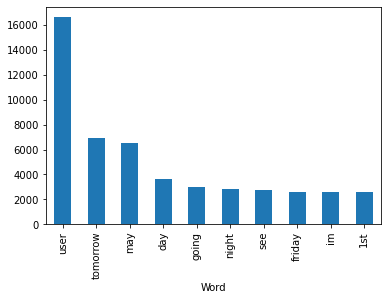

In [38]:
word_occurence.iloc[0:10].plot.bar(x="Word", y="Occurence", legend=None)

Most common words by sentiment

In [54]:
top_words = pd.DataFrame()

for i in range(df["label"].nunique() - 1):
  sentiment = df[df["label"]==str(i)]
  d={}

  for j in range(len(sentiment)):
    for k in sentiment.iloc[j][5].split():
      if k not in d:
        d[k] = 1
      else:
        d[k] += 1
  word_occurence = pd.DataFrame(list(d.items()),columns = ['Word','Occurence'])
  word_occurence = word_occurence.sort_values("Occurence", ascending=False)
  word_occurence=word_occurence.iloc[0:30]
  top_words[i]=word_occurence.iloc[:,0].values
top_words[0:15]

,0,1,2
0,like,sunday,good
1,dont,time,sunday
2,get,like,time
3,time,get,love
4,sunday,saturday,saturday
5,2nd,new,like
6,go,game,get
7,one,2nd,go
8,3rd,go,best
9,still,one,happy


Word cloud

In [52]:
from PIL import Image
import numpy as np
mask = np.array(Image.open('./twitter.jpeg'))

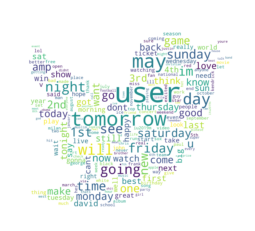

In [53]:
from wordcloud import WordCloud

text = " ".join(tweet for tweet in df.tweet)

wordcloud = WordCloud(background_color="white", mask=mask, collocations=False).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud for each sentiment



Sentiment: 0


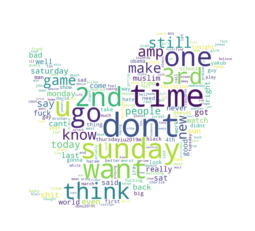


Sentiment: 1


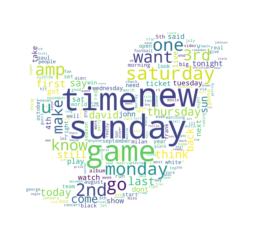


Sentiment: 2


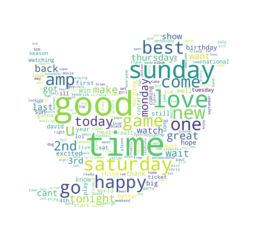

In [79]:
for i in range(df["label"].nunique() - 1):
  sentiment = df[df["label"]==str(i)]
  text = " ".join(tweet for tweet in sentiment.text_common)
  if (text != ""):
    print("\nSentiment:", i)
    wordcloud = WordCloud(background_color="white", mask=mask, collocations=False).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()